# Question

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcol
from scipy import stats
import os
import mysql.connector

In [2]:
# check file_path is valid
print(os.path.exists(r'C:\Users\ADMIN\Downloads\Telegram Desktop\vinsup\Project\data.csv'))

True


In [3]:
# import the file
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\Telegram Desktop\vinsup\Project\data.csv")

# Exploration

In [4]:
df.head()

,Employee_ID,Gender,Job_Level_after_FY20_promotions,New_hire_FY20?,FY20_Performance_Rating,Promotion_in_FY21,In_base_group_for_Promotion_FY21,Target_hire_balance,FY20_leaver,In_base_group_for_turnover_FY20,...,Promotion_in_FY20,FY19_Performance_Rating,Age_group,Age_01.07.2020,Nationality_1,Region_group_nationality_1,Broad_region_group_nationality_1,Last_hire_date,Years_since_last_hire,Rand
0,1,Male,6 - Junior Officer,N,2,No,No,0.5,Yes,Y,...,N,3,30 to 39,37,Spain,Europe,Europe,01-04-2017,3,0.177804
1,2,Female,4 - Manager,N,3,No,Yes,0.5,No,Y,...,N,0,30 to 39,37,Germany,Europe,Europe,01-04-2017,3,0.579315
2,3,Male,2 - Director,N,2,No,Yes,0.5,No,Y,...,N,3,30 to 39,35,Switzerland,Switzerland,Switzerland,01-04-2015,5,0.887683
3,4,Male,4 - Manager,N,3,No,Yes,0.5,No,Y,...,N,3,30 to 39,32,Germany,Europe,Europe,01-04-2012,8,0.053887
4,5,Female,6 - Junior Officer,N,2,No,Yes,0.5,No,Y,...,N,0,20 to 29,28,Switzerland,Switzerland,Switzerland,01-04-2019,1,0.971681


In [5]:
df.Gender.value_counts()

Gender
Male      295
Female    205
Name: count, dtype: int64

In [6]:
df['Department_01.07.2020'].value_counts()

Department_01.07.2020
Operations           203
Sales & Marketing    168
Internal Services     72
Strategy              22
Finance               18
HR                    17
Name: count, dtype: int64

# Visualtion

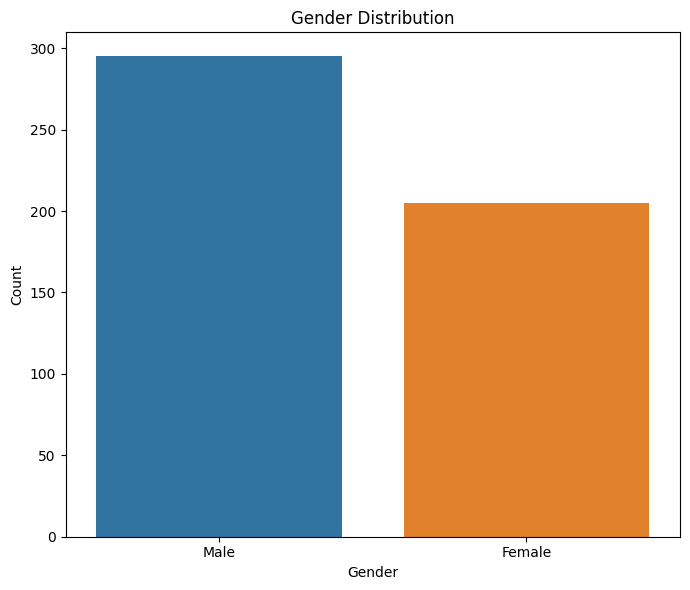

In [7]:
#Gender Distribution
plt.figure(figsize=(7,6))
sns.countplot(data=df, x='Gender', hue='Gender')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

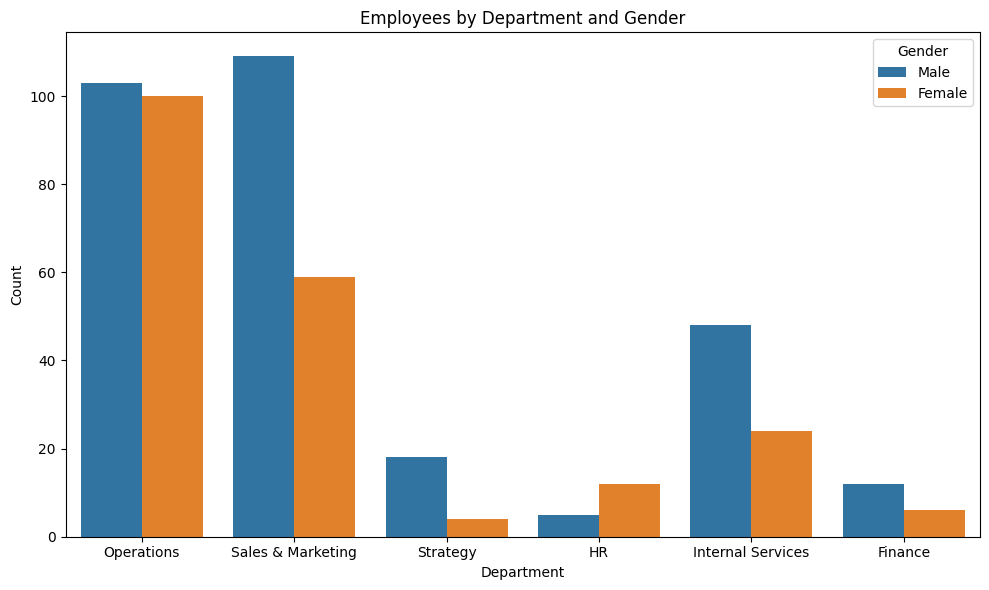

In [8]:
# Employee by Department and Gender
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Department_01.07.2020', hue='Gender')
plt.title("Employees by Department and Gender")
plt.xlabel("Department")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

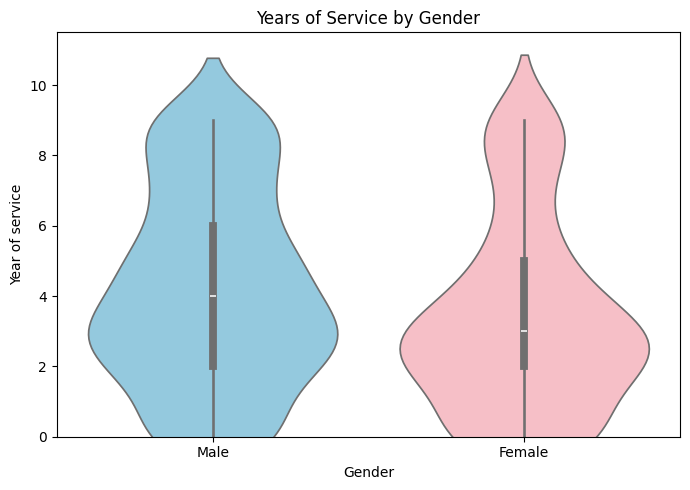

In [12]:
# Year of service Vs Gender
plt.figure(figsize=(7,5))
sns.violinplot(data=df, x="Gender", y="Years_since_last_hire",hue="Gender", palette=["skyblue","lightpink"])
plt.xlabel("Gender")
plt.ylabel("Year of service")
plt.title("Years of Service by Gender")
plt.ylim(0)
plt.tight_layout()
plt.show()

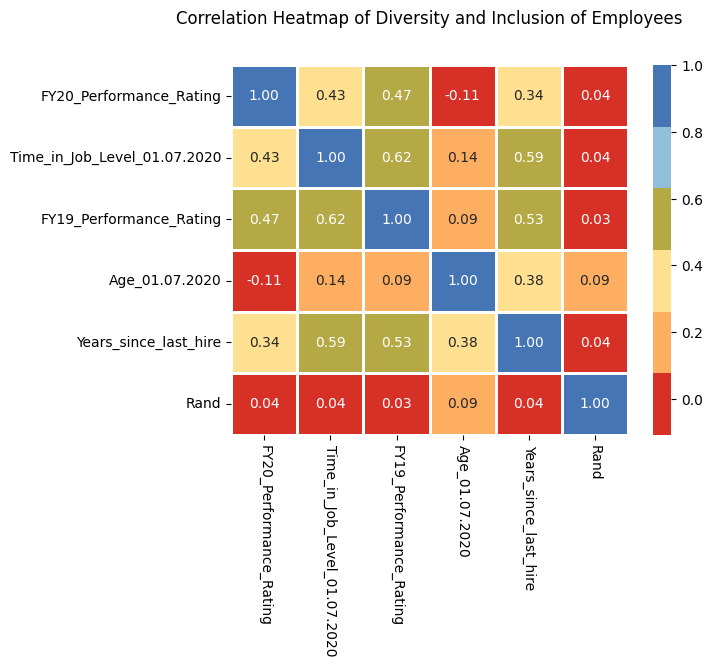

In [15]:
numeric_val = df.select_dtypes(include=["int64","float64"]).columns.tolist()
numeric_val.remove('Employee_ID')
numeric_val.remove('Target_hire_balance')

corr = df[numeric_val].corr()

colors = ["#d73027", "#fdae61", "#fee090", "#b4a945", "#91bfdb", "#4575b4"]
cmap = mcol.ListedColormap(colors)

sns.heatmap(corr, annot=True,cmap=cmap, fmt=".2f", linewidths=1)
plt.title('Correlation Heatmap of Diversity and Inclusion of Employees',pad=30)
plt.xticks(rotation=270)
square=True
plt.show()